<a href="https://colab.research.google.com/github/koksal100/Deep-Learning/blob/main/Subclassing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ds,ds_info=tfds.load("cassava",shuffle_files=True,with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5656 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incompleteF3Y1UQ/cassava-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/1885 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incompleteF3Y1UQ/cassava-test.tfrecord*...:   0%|          |…

Generating validation examples...:   0%|          | 0/1889 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incompleteF3Y1UQ/cassava-validation.tfrecord*...:   0%|     …

Dataset cassava downloaded and prepared to /root/tensorflow_datasets/cassava/0.1.0. Subsequent calls will reuse this data.


In [4]:
ds

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('validation'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
type(ds)

dict

In [6]:
train_ds=ds.get("train")
test_ds=ds.get("test")
validation_ds=ds.get("validation")

tf.Tensor([[0. 0. 0. 1. 0.]], shape=(1, 5), dtype=float32)


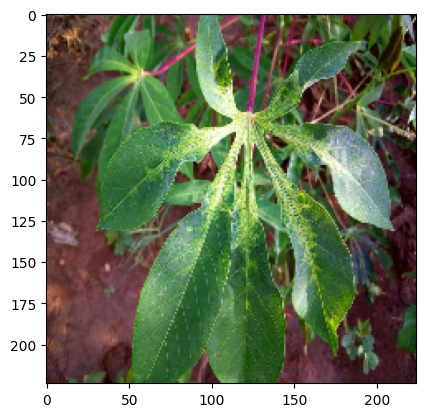

In [30]:
for image,label in train_ds.take(1):
  plt.imshow(tf.squeeze(image))
  print(label)

In [7]:
len(train_ds),len(test_ds),len(validation_ds)

(5656, 1885, 1889)

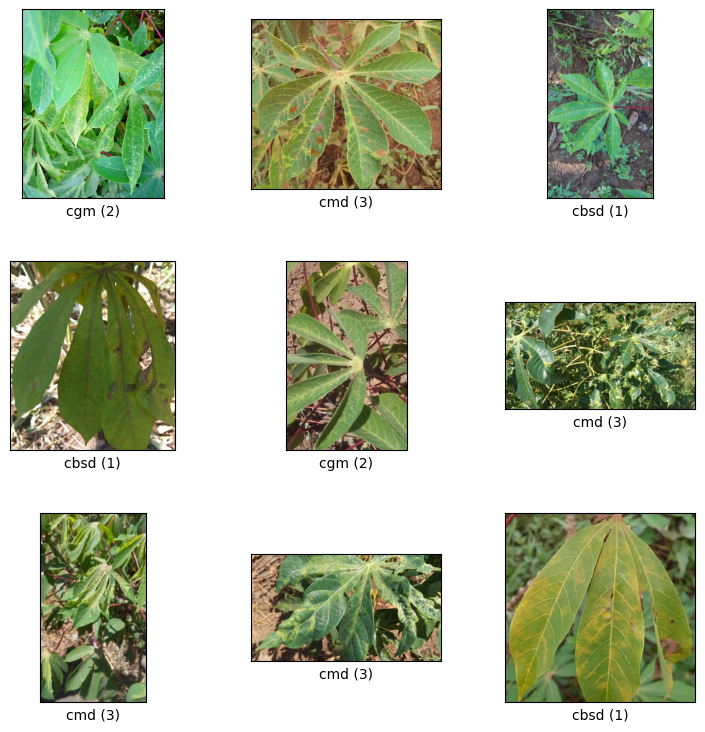

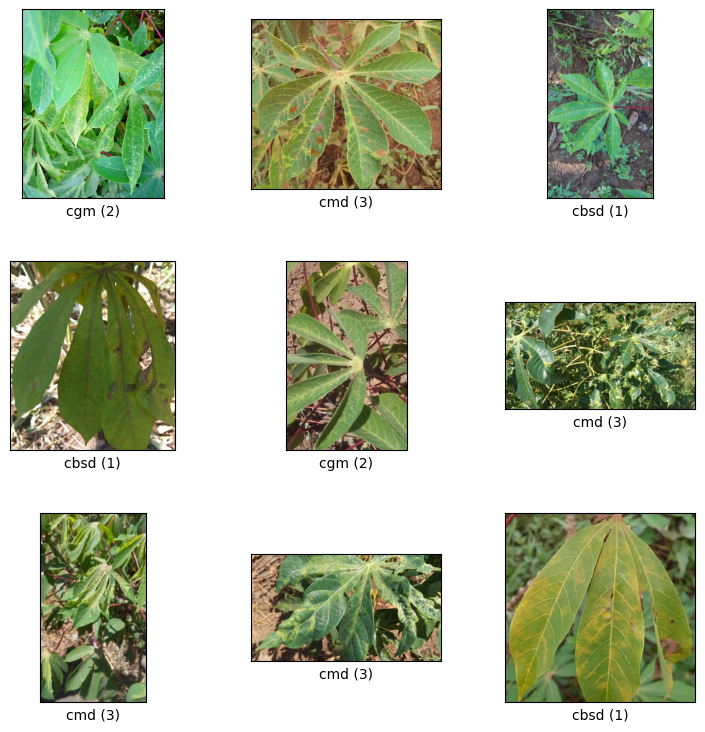

In [8]:
tfds.show_examples(train_ds,ds_info)

In [9]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [31]:
ds_info

tfds.core.DatasetInfo(
    name='cassava',
    full_name='cassava/0.1.0',
    description="""
    Cassava consists of leaf images for the cassava plant depicting healthy and
    four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
    Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
    Dataset consists of a total of 9430 labelled images.
    The 9430 labelled images are split into a training set (5656), a test set(1885)
    and a validation set (1889). The number of images per class are unbalanced with
    the two disease classes CMD and CBSD having 72% of the images.
    """,
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    data_dir=PosixGPath('/tmp/tmpvdehtlbqtfds'),
    file_format=tfrecord,
    download_size=1.26 GiB,
    dataset_size=1.26 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': Cla

In [10]:
ds_info.features["label"]

ClassLabel(shape=(), dtype=int64, num_classes=5)

In [11]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
})

In [12]:
def rescaleAndResize(image,label):
  image=tf.image.resize(image,(224,224))/255.0
  return image,label

train_ds=train_ds.map(rescaleAndResize)

In [13]:
for image,label in train_ds.take(1):
  print(image.shape)

(224, 224, 3)


In [14]:
test_ds=test_ds.map(rescaleAndResize)
validation_ds=validation_ds.map(rescaleAndResize)


In [15]:
from tensorflow.keras.layers import Rescaling, RandomRotation, RandomZoom, RandomFlip, RandomTranslation
augmentation_layers = [
    RandomRotation(factor=0.2),
    RandomZoom(height_factor=0.2, width_factor=0.2),
    RandomFlip(mode='horizontal'),
    RandomFlip(mode='vertical'),
    RandomTranslation(height_factor=0.2, width_factor=0.2)
]
augmentation=tf.keras.Sequential(augmentation_layers)

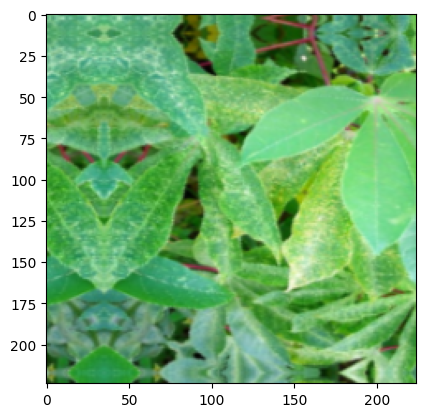

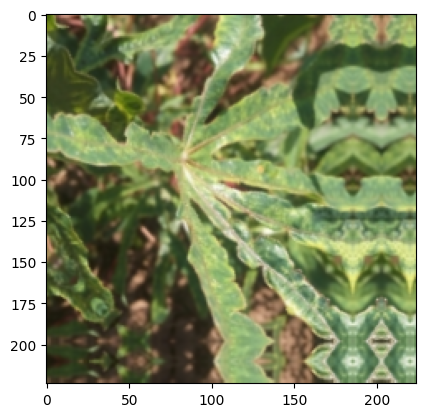

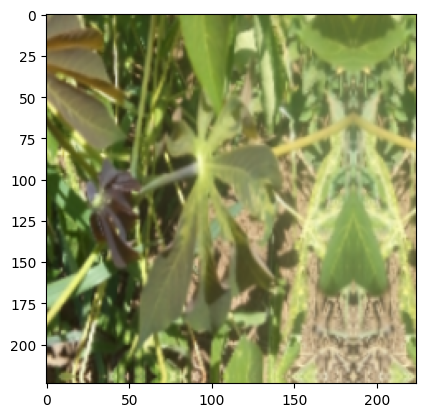

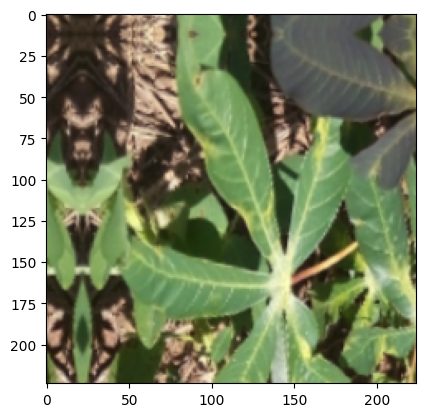

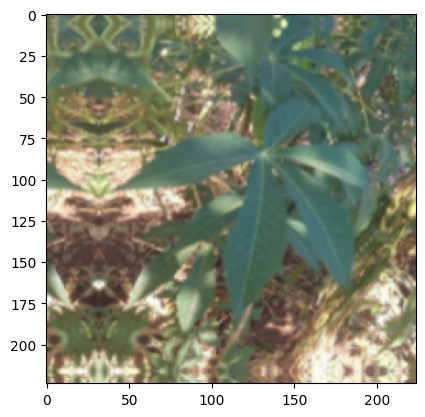

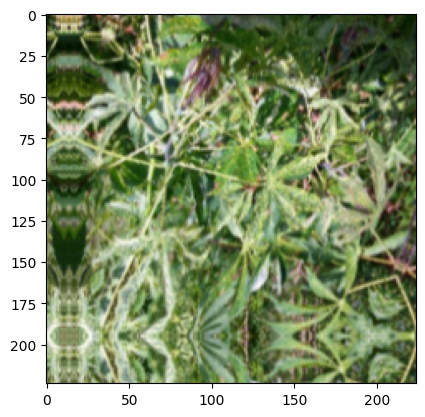

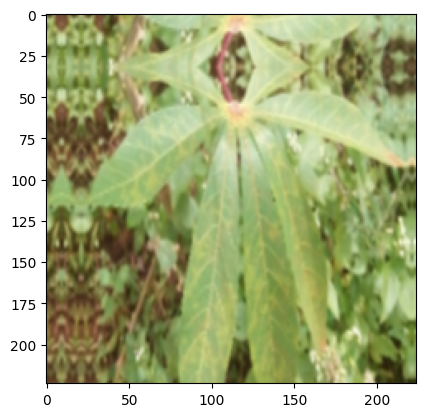

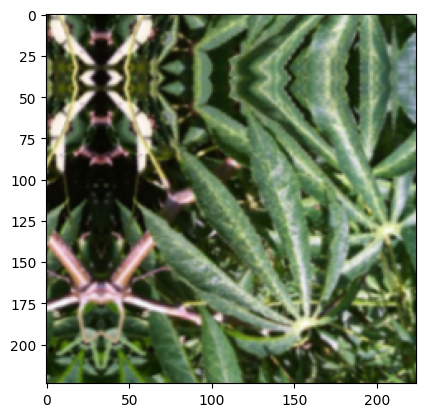

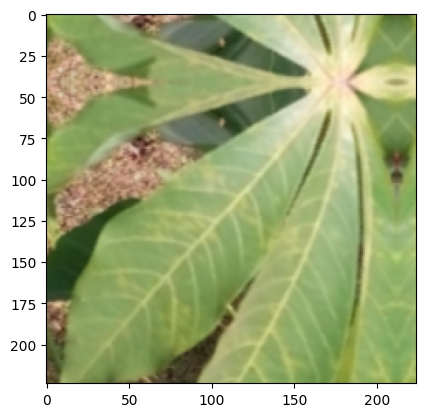

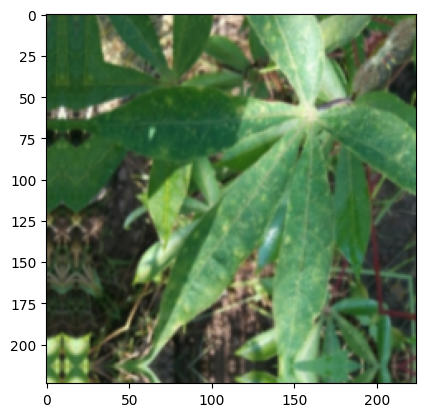

<Figure size 640x480 with 0 Axes>

In [16]:
#NOW VISUALIZE RANDOM AUGMENTED IMAGE
for image,label in train_ds.take(10):
    image=augmentation(tf.expand_dims(image,axis=0))
    plt.imshow(tf.squeeze(image))
    plt.figure()

In [17]:
#Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D (pool_size = pool_size, strides= 2*strides)

    self.conv_2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D (pool_size = pool_size, strides= 2*strides)

    def call(self, x, training):
      x = self.conv_1(x)
      x = self.batch_1(x)
      x = self.pool_1(x)

      x = self.conv_2(x)
      x = self.batch_2(x)
      x = self.pool_2(x)

      return x

feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)

In [18]:
func_input = Input(shape = (224, 224, 3), name = "Input Image")

x = feature_sub_classed(func_input)

x = Flatten()(x)

x = Dense(100, activation = "relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)

func_output = Dense(5, activation = "softmax")(x)

lenet_model_func = Model(func_input, func_output, name = "Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (Feature  (None, 224, 224, 3)       0         
 Extractor)                                                      
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 10)                

In [19]:
lenet_model_func.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"],run_eagerly=True)

In [20]:
def expandov(image,label):
  image=tf.expand_dims(image,axis=0)
  return image,label

train_ds=train_ds.map(expandov)
validation_ds=validation_ds.map(expandov)
test_ds=test_ds.map(expandov)

In [21]:
def resizeLabel(image,label):
  label=tf.one_hot(label,depth=5)
  label=tf.expand_dims(label,axis=0)
  return image,label

train_ds=train_ds.map(resizeLabel)
validation_ds=validation_ds.map(resizeLabel)
test_ds=test_ds.map(resizeLabel)

In [22]:
ds_info.features["label"]

ClassLabel(shape=(), dtype=int64, num_classes=5)

In [23]:
for image,label in validation_ds.take(1):

  print(label.shape)


(1, 5)


In [24]:
train_ds1=train_ds.take(int(len(train_ds)*0.05))

In [25]:
len(train_ds1)

282

In [ ]:
lenet_model_func.fit(train_ds1,epochs=5,validation_data=validation_ds)